In [103]:
import pandas as pd
import plotly.graph_objects as go
import math
import numpy as np
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [105]:
df = pd.read_csv('data.csv')

In [107]:
df.head(1000)

,index,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,21628,2013-12-15,24,0.08385,0.13560,0.04350,0.04470,0.00,1940697.00,0.012987,0.0
1,21629,2013-12-16,24,0.04485,0.12990,0.02250,0.03075,0.00,1493994.15,0.076723,0.0
2,21630,2013-12-17,24,0.03105,0.04335,0.01740,0.04035,0.00,2147991.12,0.883516,0.0
3,21631,2013-12-18,24,0.04005,0.05430,0.03075,0.05430,0.00,3157053.57,0.999000,0.0
4,21632,2013-12-19,24,0.05925,0.22800,0.04920,0.17430,0.00,11038835.61,0.699000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,22623,2016-09-05,24,0.03525,0.03585,0.03495,0.03540,252109.44,24769662.39,0.499500,0.0
996,22624,2016-09-06,24,0.03570,0.03630,0.03525,0.03615,197052.57,25252187.40,0.856243,0.0
997,22625,2016-09-07,24,0.03615,0.03690,0.03570,0.03630,211063.05,25381394.28,0.499500,0.0
998,22626,2016-09-08,24,0.03630,0.03690,0.03420,0.03420,138361.41,23912419.41,0.000000,0.0


In [109]:
#проверяем пустые значения
missing_values = df.isnull().sum()

print(missing_values)

index          0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1801 non-null   int64  
 1   date         1801 non-null   object 
 2   ranknow      1801 non-null   int64  
 3   open         1801 non-null   float64
 4   high         1801 non-null   float64
 5   low          1801 non-null   float64
 6   close        1801 non-null   float64
 7   volume       1801 non-null   float64
 8   market       1801 non-null   float64
 9   close_ratio  1801 non-null   float64
 10  spread       1801 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 154.9+ KB


In [113]:
zero_count = (df == 0.00).sum()

print(zero_count)

index             0
date              0
ranknow           0
open              0
high              0
low               0
close             0
volume           12
market            0
close_ratio      81
spread         1801
dtype: int64


In [115]:
selected_columns = df.iloc[:, 3:10] 
selected_columns.head()

,open,high,low,close,volume,market,close_ratio
0,0.08385,0.13560,0.04350,0.04470,0.0,1940697.00,0.012987
1,0.04485,0.12990,0.02250,0.03075,0.0,1493994.15,0.076723
2,0.03105,0.04335,0.01740,0.04035,0.0,2147991.12,0.883516
3,0.04005,0.05430,0.03075,0.05430,0.0,3157053.57,0.999000
4,0.05925,0.22800,0.04920,0.17430,0.0,11038835.61,0.699000


In [117]:
#решил проверить матрицу корреляции в результатох нет ничего удивительного
correlation_matrix = selected_columns.corr()
print(correlation_matrix)

                 open      high       low     close    volume    market  \
open         1.000000  0.995489  0.995496  0.992923  0.715600  0.990597   
high         0.995489  1.000000  0.993715  0.997379  0.760269  0.993958   
low          0.995496  0.993715  1.000000  0.996149  0.707795  0.994534   
close        0.992923  0.997379  0.996149  1.000000  0.746501  0.997352   
volume       0.715600  0.760269  0.707795  0.746501  1.000000  0.742167   
market       0.990597  0.993958  0.994534  0.997352  0.742167  1.000000   
close_ratio  0.003927  0.021479  0.016748  0.043515  0.065763  0.044327   

             close_ratio  
open            0.003927  
high            0.021479  
low             0.016748  
close           0.043515  
volume          0.065763  
market          0.044327  
close_ratio     1.000000  


In [119]:
#используется для преобразования столбца date в тип данных datetime для корректной работы
df["date"] = pd.to_datetime(df["date"])

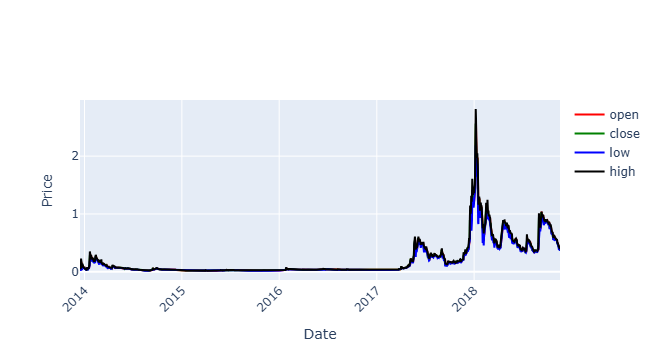

In [121]:
#ресуем график цен
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['date'], y=df['open'], mode='lines', name='open', line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=df['date'], y=df['close'], mode='lines', name='close', line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=df['date'], y=df['low'], mode='lines', name='low', line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df['date'], y=df['high'], mode='lines', name='high', line=dict(color='black', width=2)))

fig.update_layout(xaxis_title="Date",
                  yaxis_title="Price",
                  xaxis_tickangle=-45)

fig.show()

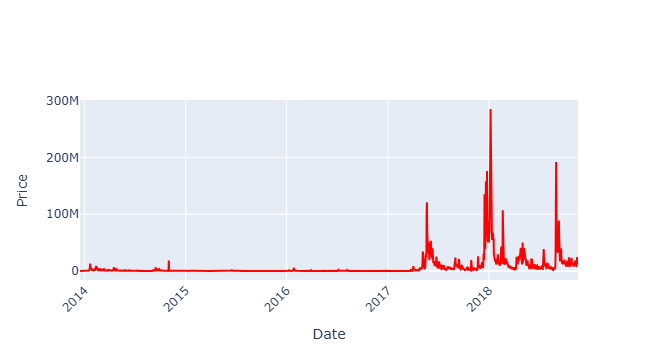

In [123]:
# посмотрим еще на обем торгов
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['date'], y=df['volume'], mode='lines', name='open', line=dict(color='red', width=2)))

fig.update_layout(xaxis_title="Date",
                  yaxis_title="Price",
                  xaxis_tickangle=-45)

fig.show()

In [127]:
#функции для расчета метрик
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def return_rmse(test, predicted):
    """Вычисляет и выводит RMSE."""
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("Корень из среднеквадратичной ошибки (RMSE): {:.4f}".format(rmse))
    return rmse

def return_mae(test, predicted):
    """Вычисляет и выводит MAE."""
    mae = mean_absolute_error(test, predicted)
    print("Средняя абсолютная ошибка (MAE): {:.4f}".format(mae))
    return mae

def return_r2(test, predicted):
    """Вычисляет и выводит R²."""
    r2 = r2_score(test, predicted)
    print("Коэффициент детерминации (R²): {:.4f}".format(r2))
    return r2

In [129]:
# поделим выборку на тестовые и тренеровочные данные
train = df[df['date'] <= '2017-12-01'].iloc[:,3:4].values
test = df[df['date'] > '2017-12-01'].iloc[:,3:4].values

In [135]:
print(test.shape[0] / train.shape[0])#в таком процентом соотношении поделили выборку

0.24378453038674033


In [137]:
from sklearn.preprocessing import MinMaxScaler
#нормализуем данные
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [139]:
#в 2ух чанках делаем датасет где временной ряд берем 60
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [141]:
time_step = 60
X_train, y_train = create_dataset(train_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [143]:
def prepare_and_predict(model, data, scaler, time_step):
    
    inputs = data["high"][len(data) - len(test) - time_step:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    X_test = []
    for i in range(time_step, len(inputs)):
        X_test.append(inputs[i-time_step:i, 0])
    
    X_test = np.array(X_test)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    return predicted_prices

In [145]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout
#инцилизируем lstm и обучаем

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0143
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0049
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0051
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0028
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0036
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0037
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0032
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0031
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0027
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0032
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0028
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0030
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0034
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0023
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0034
Epoch 16/50
44/

In [147]:
predicted_prices = prepare_and_predict(regressor, df, scaler, time_step)
rmse_value = return_rmse(test, predicted_prices)
mae_value = return_mae(test, predicted_prices)
r2_value = return_r2(test, predicted_prices)
#R2 метрика 0.61 что счетаеться неплохо но требуется улучшения

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Корень из среднеквадратичной ошибки (RMSE): 0.2134
Средняя абсолютная ошибка (MAE): 0.1114
Коэффициент детерминации (R²): 0.6120


In [149]:
import pickle
with open('lstm_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)


In [151]:
#попробуем улуччшить модель 
#тк до 2017-04-01 обем продаж был маловат я решил попробывать обрезать выборку и обучить на таких данных
df = df[df['date'] >= '2017-04-01']

In [153]:
df.head()

,index,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1203,22831,2017-04-01,24,0.04995,0.05235,0.04755,0.05025,1019977.2,36097072.11,0.561937,0.0
1204,22832,2017-04-02,24,0.05040,0.07905,0.04920,0.07335,4234121.1,52705393.29,0.808191,0.0
1205,22833,2017-04-03,24,0.07350,0.09495,0.06075,0.06405,8617435.2,46008685.80,0.096404,0.0
1206,22834,2017-04-04,24,0.06480,0.07350,0.06135,0.06480,3040280.1,46545986.52,0.283716,0.0
1207,22835,2017-04-05,24,0.06570,0.06675,0.06330,0.06630,1679782.5,47577477.42,0.868730,0.0


In [155]:
# поделим выборку на тестовые и тренеровочные данные
train = df[df['date'] <= '2018-08-01'].iloc[:,3:4].values
test = df[df['date'] > '2018-08-01'].iloc[:,3:4].values

In [157]:
print(test.shape[0] / train.shape[0])#в таком процентом соотношении поделили выборку

0.22540983606557377


In [159]:
time_step = 60
X_train, y_train = create_dataset(train_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [161]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout

regressor2 = Sequential()
regressor2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units=50, return_sequences=True))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units=50, return_sequences=True))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units=50))
regressor2.add(Dropout(0.2))
regressor2.add(Dense(units=1))

regressor2.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor2.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0180
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0066
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0051
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0033
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0042
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0030
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0031
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0028
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0026
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0028
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0040
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0029
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0030
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0028
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0024
Epoch 16/50
44/

In [162]:
predicted_prices = prepare_and_predict(regressor, df, scaler, time_step)
rmse_value = return_rmse(test, predicted_prices)
mae_value = return_mae(test, predicted_prices)
r2_value = return_r2(test, predicted_prices)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Корень из среднеквадратичной ошибки (RMSE): 0.1034
Средняя абсолютная ошибка (MAE): 0.0721
Коэффициент детерминации (R²): 0.7622


In [165]:
import pickle
with open('lstm_model2.pkl', 'wb') as file:
    pickle.dump(regressor, file)


In [ ]:
#когда мы так сказать обработали данные модель стала точнее работать 
#можно было бы еще обучить gru но насколько я знаю она менее точно работает чем lstm

In [169]:
#делаем предскозания лучшей моделью на 10 дней вперед
n_days = 10

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['open'].values.reshape(-1, 1))

def predict_future(model, data, time_step, n_days):
    last_values = data[-time_step:].reshape(1, time_step, 1)
    predictions = []

    for _ in range(n_days):
        next_pred = model.predict(last_values)
        predictions.append(next_pred[0, 0])

        last_values = np.append(last_values[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions
    
future_predictions = predict_future(regressor2, data_scaled, time_step, n_days)

predicted_dates = pd.date_range(start=df['date'].iloc[-1] + pd.Timedelta(days=1), periods=n_days)
predicted_df = pd.DataFrame(data=future_predictions, index=predicted_dates, columns=['Predicted High'])

print(predicted_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
            Predicted High
2018-11-20        0.536987
2018-11-21        0.527891
2018-11-22        0.527437
2018-11-23        0.535138
2018-11-24        0.549071
2018-11-25        0.567188
2018-11-26        0.587922
2018-11-27        0.610348
2018-11-28        0.634043
2018-11-29        0.658911
